# Diabetes ~ Diagnosis Predictions

In [52]:
# This is for dataframe manipulation.
import pandas

# This is for special high-efficiency arrays.
import numpy

# This is for plotting data-points.
import matplotlib.pyplot as pyplot

# These various imports will be explained as they are used later.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Activation

In [53]:
#load in dataset
data = pandas.read_csv('./data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
Y = data.loc[:, ['Outcome']]
X = data.drop(columns=['Outcome'])

display(X.head())
display(Y.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


,Outcome
0,1
1,0
2,1
3,0
4,1


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [56]:
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


In [57]:
X_scaled = MinMaxScaler()
X_scaled.fit(X_train)
X_scaled.transform(X_test)

array([[0.05882353, 1.00505051, 0.62295082, ..., 0.63934426, 0.56191289,
        0.01666667],
       [0.11764706, 0.54040404, 0.60655738, ..., 0.50074516, 0.13919727,
        0.03333333],
       [0.23529412, 0.38383838, 0.50819672, ..., 0.50670641, 0.13364646,
        0.06666667],
       ...,
       [0.05882353, 0.55050505, 0.49180328, ..., 0.37853949, 0.37105038,
        0.        ],
       [0.17647059, 0.64646465, 0.63934426, ..., 0.31445604, 0.08112724,
        0.56666667],
       [0.29411765, 0.44444444, 0.63934426, ..., 0.41132638, 0.07685739,
        0.26666667]])

In [61]:
model = Sequential()
model.add(Dense(8, input_dim = 8, kernel_initializer='normal'))
model.add(Activation('softmax'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [62]:
model.fit(X_train, Y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 460 samples, validate on 116 samples
Epoch 1/150
460/460 [==============================] - 0s 600us/step - loss: 0.7475 - acc: 0.3674 - val_loss: 0.7172 - val_acc: 0.3276
Epoch 2/150
460/460 [==============================] - 0s 31us/step - loss: 0.7010 - acc: 0.4326 - val_loss: 0.6925 - val_acc: 0.5690
Epoch 3/150
460/460 [==============================] - 0s 30us/step - loss: 0.6908 - acc: 0.6130 - val_loss: 0.6877 - val_acc: 0.6810
Epoch 4/150
460/460 [==============================] - 0s 29us/step - loss: 0.6882 - acc: 0.6239 - val_loss: 0.6839 - val_acc: 0.6810
Epoch 5/150
460/460 [==============================] - 0s 30us/step - loss: 0.6857 - acc: 0.6326 - val_loss: 0.6809 - val_acc: 0.6810
Epoch 6/150
460/460 [==============================] - 0s 29us/step - loss: 0.6832 - acc: 0.6326 - val_loss: 0.6772 - val_acc: 0.6810
Epoch 7/150
460/460 [==============================] - 0s 30us/step - loss: 0.6799 - acc: 0.6326 - val_loss: 0.6713 - val_acc: 0.6810
Epoch 8/150
460

460/460 [==============================] - 0s 31us/step - loss: 0.6072 - acc: 0.6326 - val_loss: 0.6171 - val_acc: 0.6810
Epoch 62/150
460/460 [==============================] - 0s 32us/step - loss: 0.6065 - acc: 0.6326 - val_loss: 0.6178 - val_acc: 0.6810
Epoch 63/150
460/460 [==============================] - 0s 29us/step - loss: 0.6054 - acc: 0.6326 - val_loss: 0.6200 - val_acc: 0.6810
Epoch 64/150
460/460 [==============================] - 0s 32us/step - loss: 0.6050 - acc: 0.6326 - val_loss: 0.6222 - val_acc: 0.6810
Epoch 65/150
460/460 [==============================] - 0s 29us/step - loss: 0.6050 - acc: 0.6326 - val_loss: 0.6206 - val_acc: 0.6810
Epoch 66/150
460/460 [==============================] - 0s 29us/step - loss: 0.6054 - acc: 0.6326 - val_loss: 0.6219 - val_acc: 0.6810
Epoch 67/150
460/460 [==============================] - 0s 26us/step - loss: 0.6054 - acc: 0.6326 - val_loss: 0.6197 - val_acc: 0.6810
Epoch 68/150
460/460 [==============================] - 0s 26us/step

460/460 [==============================] - 0s 29us/step - loss: 0.5843 - acc: 0.6978 - val_loss: 0.6306 - val_acc: 0.6897
Epoch 122/150
460/460 [==============================] - 0s 28us/step - loss: 0.5850 - acc: 0.7130 - val_loss: 0.6295 - val_acc: 0.6897
Epoch 123/150
460/460 [==============================] - 0s 29us/step - loss: 0.5831 - acc: 0.7000 - val_loss: 0.6272 - val_acc: 0.6897
Epoch 124/150
460/460 [==============================] - 0s 28us/step - loss: 0.5844 - acc: 0.6913 - val_loss: 0.6302 - val_acc: 0.6897
Epoch 125/150
460/460 [==============================] - 0s 26us/step - loss: 0.5832 - acc: 0.7043 - val_loss: 0.6284 - val_acc: 0.6897
Epoch 126/150
460/460 [==============================] - 0s 31us/step - loss: 0.5836 - acc: 0.6935 - val_loss: 0.6276 - val_acc: 0.6810
Epoch 127/150
460/460 [==============================] - 0s 31us/step - loss: 0.5830 - acc: 0.6913 - val_loss: 0.6268 - val_acc: 0.6983
Epoch 128/150
460/460 [==============================] - 0s 32

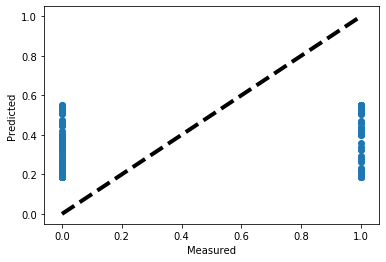

In [63]:
Y_predict = model.predict(X_test)
figure, axis = pyplot.subplots()

axis.scatter(Y_test, Y_predict)
axis.plot(
	[Y_test.min(), Y_test.max()],
	[Y_test.min(), Y_test.max()],
	'k--', lw=4
)
axis.set_xlabel('Measured')
axis.set_ylabel('Predicted')

pyplot.show()